<a href="https://colab.research.google.com/github/glatham1/ECGR_4105_MachineLearning/blob/main/FinalProject_Classical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Metrics:
Accuracy: 0.5055555555555555
Precision: 0.5275143938884166
Recall: 0.5309304200784007
F1 Score: 0.5203809135997107


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


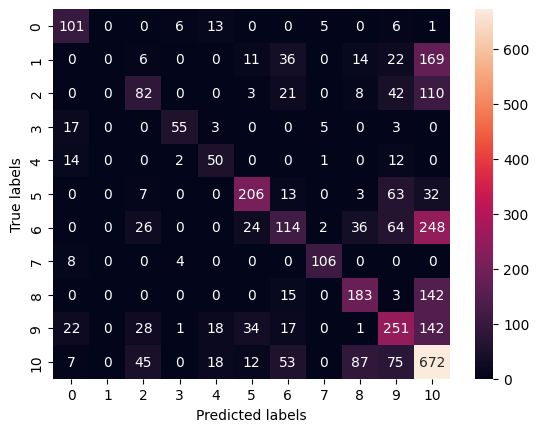

SVM Metrics:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5025
Precision: 0.5295611381150246
Recall: 0.5153056201786753
F1 Score: 0.5125120173669919


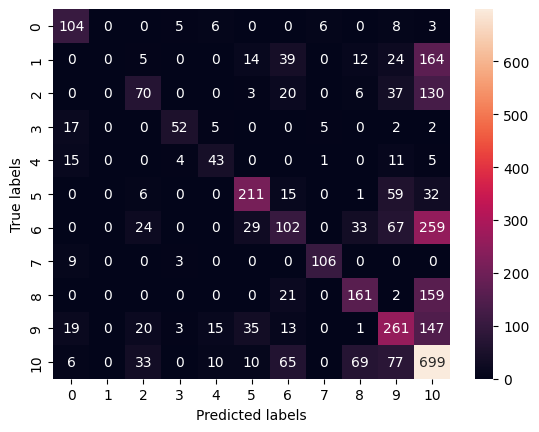

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
genres = pd.read_csv("train.csv")
genres = genres.fillna(0)

# Preprocess data
X = genres.iloc[:, 2:15].values
y = genres.iloc[:, 16].values

# Standardize data
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

# Initialize models
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0)
svm = SVC(kernel='linear', C=1.0)

# Fit models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict and evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
evaluate_model(log_reg, X_test, y_test)

# Evaluate SVM
print("SVM Metrics:")
evaluate_model(svm, X_test, y_test)
